In [1]:
"""
Depression dataset.
"""

####################################################################################################
# Part 1 - Load the dataset

from src.data.datasets import prepare_iba_depression

depression = prepare_iba_depression(sen_attr='Sex')
print(list(depression.keys()))

X_tr, X_tst = depression['X_norm']  # Normalized features
y_tr, y_tst = depression['y']
z_tr, z_tst = depression['z']
X_cr_tr, X_cr_tst = depression['X_norm_cr']  # Normalized features with correlation removed

['X', 'y', 'z', 'X_norm', 'X_norm_cr']


In [2]:
depression['X'][0]

,Sex,Race,Housing,Delay,Anhedonia,Dep_Mood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,Unusual_Thought
10451,Male,Black,Unstable,No,2.763912,4.715914,8.232915,2.804073,5.718883,4.068041,7.758049,5.274786,5.953100,3.457079,2.413096,3.852923,8.399742,3.456556
4281,Female,Black,Stable,Yes,6.247392,4.754718,6.375607,4.551849,4.835035,8.642938,7.977494,7.303839,2.677737,4.216469,3.662766,5.441960,7.824104,-0.098588
5971,Female,Black,Stable,No,10.008742,4.617875,6.074679,7.867882,4.137172,6.311322,5.108380,5.922128,3.373767,2.025265,2.512930,5.989168,4.976191,2.530898
6263,Male,Black,Stable,Yes,4.608371,6.525419,6.229736,5.079108,0.876946,4.920331,7.780508,2.052468,3.162196,5.948881,6.172597,5.891156,6.806563,4.086574
1752,Female,White,Stable,No,5.584905,7.545237,3.746617,2.765319,3.393566,5.632568,8.698915,1.656545,1.798278,3.698386,3.631202,4.517136,5.378102,5.495370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,Female,Black,Stable,Yes,5.975986,6.258138,5.747458,2.846016,3.104494,9.960052,5.721145,4.191671,1.448894,-0.113226,4.123534,6.040633,6.247846,1.092722
6049,Female,White,Stable,Yes,6.433795,8.415151,6.992490,6.772102,5.475710,6.674316,5.681146,4.567345,3.878126,3.047648,2.873144,4.459943,2.764719,1.297074
2743,Female,Hispanic,Stable,No,2.919418,6.957346,10.430279,5.043167,4.686633,2.717198,7.533197,3.912744,2.922493,4.616202,3.995408,4.141917,5.092982,3.423999
5657,Female,Black,Stable,No,7.581011,8.213331,7.858455,5.071557,4.763541,5.375148,4.393906,5.323099,2.800296,3.328833,5.611054,3.267371,5.397589,1.704606


In [2]:
# 0 is female and 1 is male
Xy_tr = X_tr.copy()
Xy_tr['depression'] = y_tr
print("Training set")
print('-' * 30)
print(Xy_tr['Sex'].value_counts())
print(Xy_tr.groupby(['Sex'])['depression'].mean())
print()

Xy_tst = X_tst.copy()
Xy_tst['depression'] = y_tst
print("Test set")
print('-' * 30)
print(Xy_tst['Sex'].value_counts())
print(Xy_tst.groupby(['Sex'])['depression'].mean())

Training set
------------------------------
Sex
0.0    5478
1.0    4422
Name: count, dtype: int64
Sex
0.0    0.507194
1.0    0.504263
Name: depression, dtype: float64

Test set
------------------------------
Sex
0.0    585
1.0    515
Name: count, dtype: int64
Sex
0.0    0.370370
1.0    0.466667
Name: depression, dtype: float64


In [3]:
####################################################################################################
# Part 2 - Train different classifiers

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

DATA_PATH = './data/'
PLOTS_PATH = './plots/'

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Net": MLPClassifier(hidden_layer_sizes=(50,), 
                                activation='relu',
                                batch_size=200,
                                alpha=1, 
                                max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False, 
                                   train_dir=DATA_PATH + 'catboost_info_depression/')
}

In [4]:
for name, clf in classifiers.items():
    clf.fit(X_tr, y_tr)
    score = clf.score(X_tst, y_tst)
    print(f"{name}: {score}")

Logistic Regression: 0.9372727272727273
Nearest Neighbors: 0.9245454545454546
Linear SVM: 0.9354545454545454
Decision Tree: 0.9
Random Forest: 0.9054545454545454
Neural Net: 0.9563636363636364
AdaBoost: 0.9354545454545454
XGBoost: 0.9509090909090909
CatBoost: 0.96


In [5]:
####################################################################################################
# Part 3 - Train CatBoost with fairness mitigation

from src.models.fairness.fairlearn import FairSklearnModel
from src.metrics.fairness import eval_clf_fairness

model = CatBoostClassifier(verbose=False, train_dir=DATA_PATH + 'catboost_info_depression/')
metrics = {}

# Unmitigated
print("Unmitigated...\n")
logreg = FairSklearnModel(model)
logreg.fit_raw(X_tr, y_tr)
metrics['unmitigated'] = eval_clf_fairness(y_tst, logreg.predict(X_tst), z_tst)

# Mitigated with correlation remover
print("Mitigated with correlation remover...\n")
logreg = FairSklearnModel(model)
logreg.fit_raw(X_cr_tr, y_tr)
metrics['corr_remover'] = eval_clf_fairness(y_tst, logreg.predict(X_cr_tst), z_tst)

# Mitigated with exponentiated gradient
print("Mitigated with exponentiated gradient...\n")
logreg = FairSklearnModel(model)
logreg.fit_exp_grad(X_cr_tr, y_tr, z_tr)
metrics['exp_grad'] = eval_clf_fairness(y_tst, logreg.predict(X_cr_tst), z_tst)

# Mitigated with grid search
print("Mitigated with grid search...\n")
logreg = FairSklearnModel(model)
logreg.fit_grid_search(X_cr_tr, y_tr, z_tr)
metrics['grid_search'] = eval_clf_fairness(y_tst, logreg.predict(X_cr_tst), z_tst)

# Mitigated with threshold optimizer
print("Mitigated with threshold optimizer...\n")
logreg = FairSklearnModel(model)
logreg.fit_threshold_optimizer(X_cr_tr, y_tr, z_tr)
metrics['threshold_optimizer'] = eval_clf_fairness(y_tst, logreg.predict(X_cr_tst, list(z_tst)), z_tst)

Unmitigated...

Mitigated with correlation remover...

Mitigated with exponentiated gradient...

Mitigated with grid search...

Mitigated with threshold optimizer...



In [6]:
####################################################################################################
# Part 4 - Adversary mitigation

from fairlearn.adversarial import AdversarialFairnessClassifier
import warnings

warnings.filterwarnings("ignore")

mitigator = AdversarialFairnessClassifier(
    backend="torch",
    predictor_model=[50, "leaky_relu"],
    adversary_model=[3, "leaky_relu"],
    batch_size=2000,
    random_state=123,
    epochs=50
)
mitigator.fit(X_tr, y_tr, sensitive_features=z_tr)
metrics['adversary'] = eval_clf_fairness(y_tst, mitigator.predict(X_cr_tst), z_tst)

In [7]:
####################################################################################################
# Part 5 - Evaulate the fairness metrics

import pandas as pd

fairness_options = ["selection rate", "true positive rate", "false positive rate"]
fairness_dict = {}
performance_options = ["accuracy", "precision", "recall"]
performance_dict = {}
for key in metrics:
    fairness_dict[key] = list(metrics[key].difference()[fairness_options].values)
    performance_dict[key] = list(metrics[key].overall[performance_options].values)
fairness_frame = pd.DataFrame(fairness_dict, index=['SR-Diff', 'TPR-Diff', 'FPR-Diff'])
performance_frame = pd.DataFrame(performance_dict, index=['ACC', 'PREC', 'RECALL'])

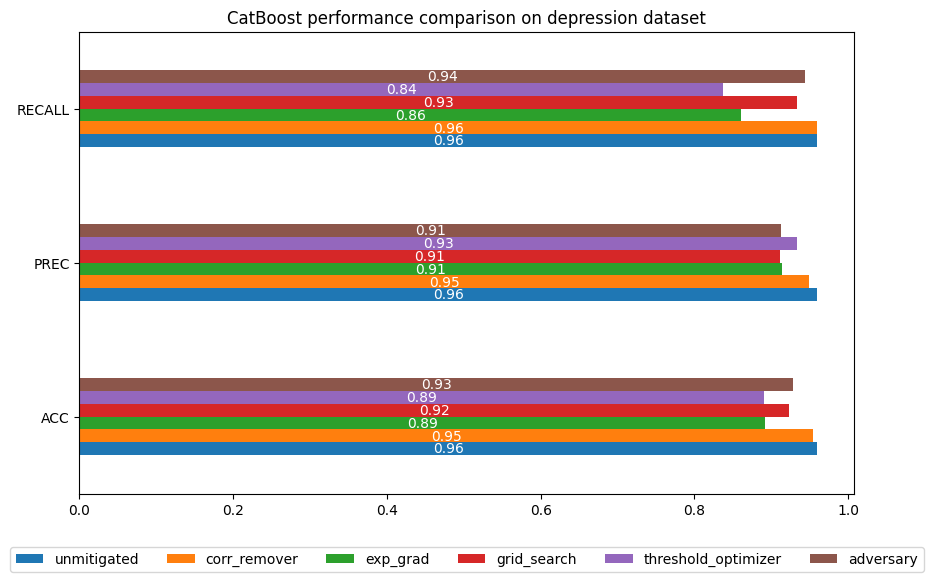

In [8]:
title = 'CatBoost performance comparison on depression dataset'
fig = performance_frame.plot(kind='barh', figsize=(10, 6), 
                             title=title, rot=0)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)
for container in fig.containers:
    fig.bar_label(container, label_type='center', color='white', fmt='%.2f')
fig.get_figure().savefig(PLOTS_PATH + title + '.png', bbox_inches='tight', dpi=300)

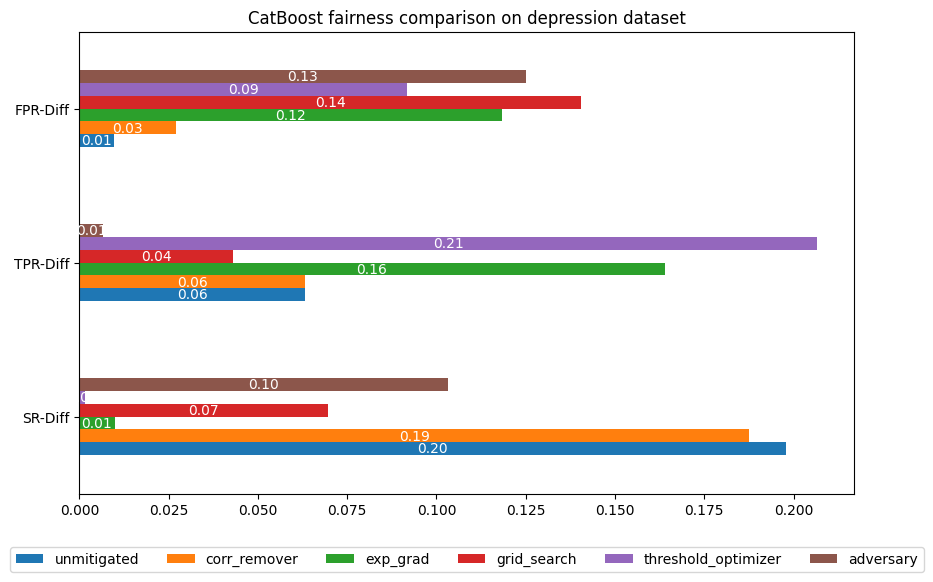

In [9]:
title = 'CatBoost fairness comparison on depression dataset'
fig = fairness_frame.plot(kind='barh', figsize=(10, 6), 
                          title=title, rot=0)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)
for container in fig.containers:
    fig.bar_label(container, label_type='center', color='white', fmt='%.2f')
fig.get_figure().savefig(PLOTS_PATH + title + '.png', bbox_inches='tight', dpi=300)

**Comments:**

Adversay learning is almost as good as grid search, as it has 1% higher accuracy and 3% higher selection rate difference. After hyperparameter tuning, it is possible that adversay learning will outperform grid search.

Grid search is better than exponentiated gradient method, because of the following reasons:
- It mitigates unfairness without sacrificing too much accuracy (`grid_search`: 0.92, `exp_grad`: 0.89).
- It is easy to implement and appicable to any blackbox model (`exp_grad` requires `sample_weights` for training).
- The predicted selection rate difference (7%) is close to true selection rate difference (9%).

Correlation remover does not make much difference. It decreases the selection rate a little bit and decrease the accuracy a little bit.

Threshold optimizer migitates the selection rate difference the most, but it also sacrifices the accuracy (0.89) and increase the TPR the most.

